### Feature Engineering in Machine Learning

#### What is Feature Engineering?

Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data that can help machine learning algorithms perform better. The goal is to transform raw data into meaningful features that represent the underlying problem and are most relevant to the task at hand.

Feature engineering can involve:

1. **Creating New Features**: Generating new features from existing ones to better capture the patterns in the data.
2. **Transforming Features**: Applying mathematical transformations to existing features to scale, normalize, or encode them.
3. **Selecting Features**: Identifying the most relevant features for the problem to reduce dimensionality and improve model performance.
4. **Handling Missing Values**: Dealing with missing or incomplete data in a way that preserves the integrity of the dataset.

#### Why is Feature Engineering Important?

1. **Improves Model Accuracy**: Well-engineered features can significantly enhance the accuracy of machine learning models.
2. **Reduces Overfitting**: By selecting the most relevant features and reducing noise, feature engineering helps in creating more generalizable models.
3. **Enhances Interpretability**: Well-defined features make the models more interpretable and easier to understand.
4. **Speeds Up Training**: Reducing the dimensionality of the data can speed up the training process of machine learning models.

### Example: Feature Engineering for Linear Regression

In this example, we'll use the "Wine Quality" dataset. The goal is to predict the quality of the wine based on its chemical properties.

#### Step-by-Step Guide

1. **Load the Dataset**: Import the dataset and necessary libraries.
2. **Explore the Data**: Understand the data structure, summary statistics, and relationships between features.
3. **Handle Missing Values**: Identify and handle any missing values.
4. **Feature Transformation**: Apply scaling, normalization, and encoding as necessary.
5. **Feature Creation**: Create new features from existing ones to capture additional information.
6. **Feature Selection**: Select the most relevant features for the regression task.
7. **Train the Model**: Train a linear regression model using the engineered features.
8. **Evaluate the Model**: Evaluate the model performance using appropriate metricg can be applied to improve the performance of a linear regression model by transforming and creating new features.

### Conditions for Using Linear Regression

Linear Regression is a powerful and widely used method for predicting continuous outcomes. However, it is important to ensure that certain assumptions and conditions are met to use this model effectively. Here are the key conditions and methods to check whether Linear Regression can be used to fit the data:

#### 1. Linearity
- **Condition**: The relationship between the independent variables (features) and the dependent variable (target) should be linear.
- **Method to Check**: Plot the data and visually inspect the relationship. Use scatter plots or residual plots to identify any non-linear patterns.

#### 2. Independence
- **Condition**: Observations should be independent of each other. This means that the data points should not be correlated with each other.
- **Method to Check**: Examine the study design and data collection process. For time-series data, use the Durbin-Watson test to check for autocorrelation.

#### 3. Homoscedasticity
- **Condition**: The residuals (errors) should have constant variance at all levels of the independent variables.
- **Method to Check**: Plot the residuals versus the fitted values. If the spread of the residuals is roughly constant across all levels of the independent variables, the assumption is met. Look for patterns in the residuals plot; if the residuals fan out or form patterns, homoscedasticity is violated.

#### 4. Normality of Residuals
- **Condition**: The residuals should be approximately normally distributed.
- **Method to Check**: Use a Q-Q plot (quantile-quantile plot) to compare the distribution of the residuals to a normal distribution. You can also use statistical tests such as the Shapiro-Wilk test.

#### 5. No Multicollinearity
- **Condition**: Independent variables should not be too highly correlated with each other.
- **Method to Check**: Calculate the Variance Inflation Factor (VIF) for each predictor. A VIF value greater than 5-10 indicates high multicollinearity and suggests that the model might have issues.

In [1]:
# !pip install seaborn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [3]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Explore the data
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nCheck for missing values:")
print(df.isnull().sum())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Summary statistics of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000

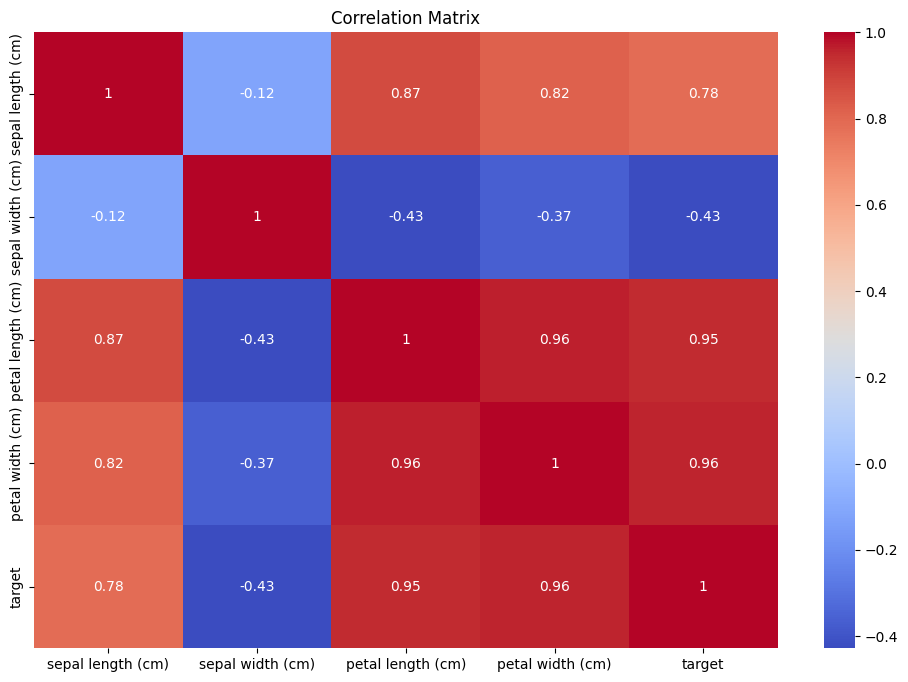

In [5]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

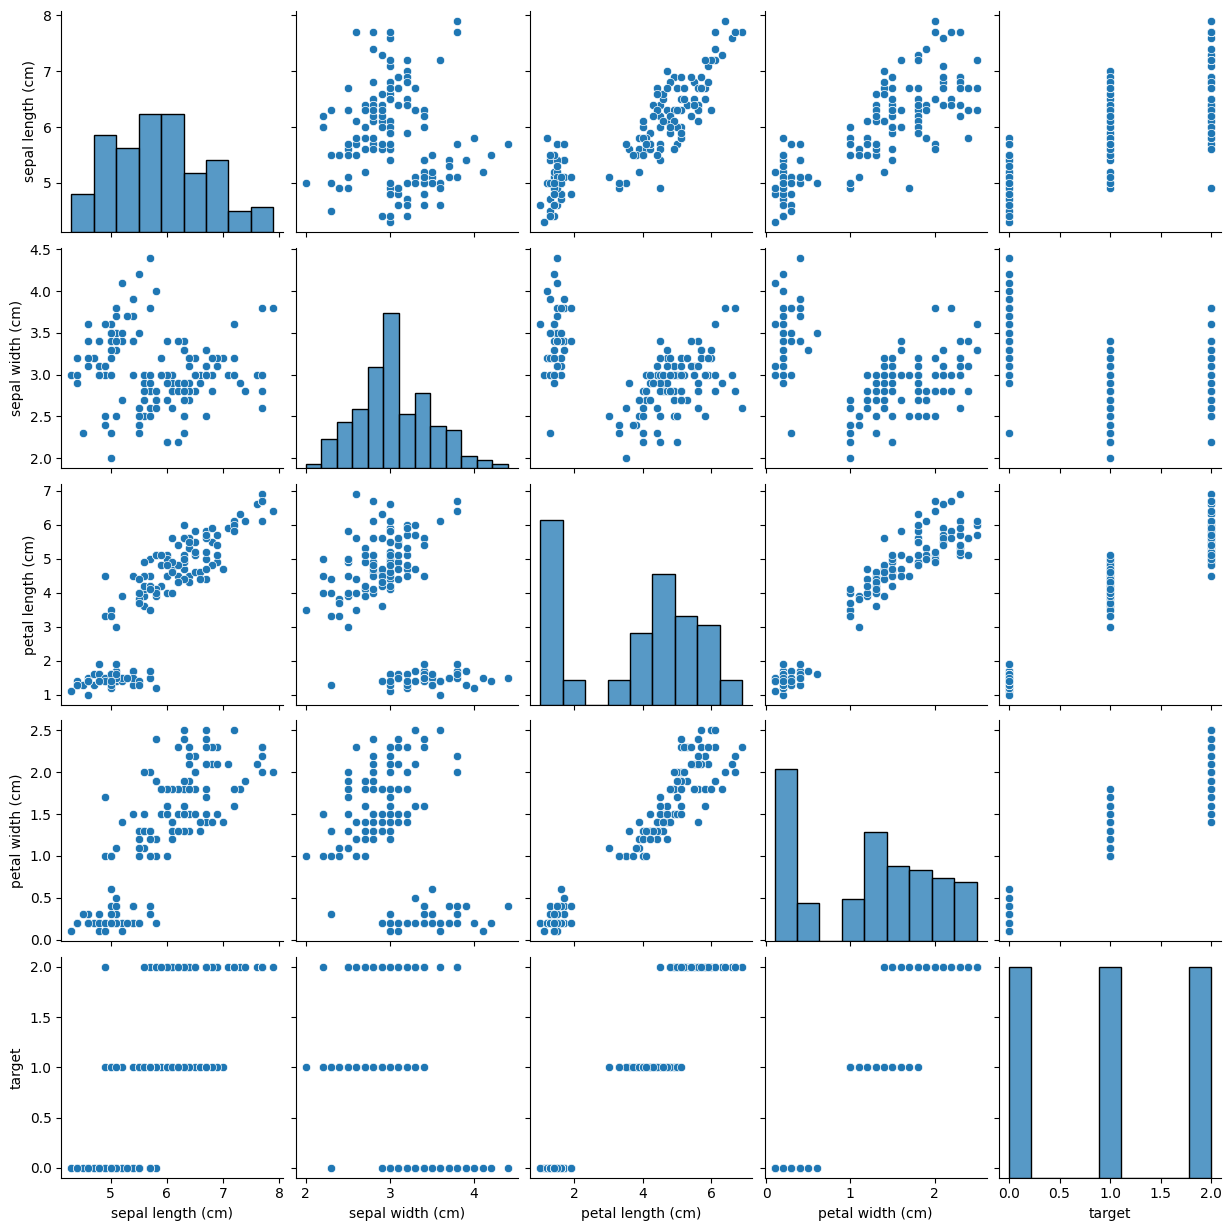

In [6]:
# Linearity Check: Pairplot
sns.pairplot(df)
plt.show()

In [7]:
# Feature Transformation: Standardization
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Feature Creation: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_df.drop('target', axis=1))
poly_feature_names = poly.get_feature_names_out(df.drop('target', axis=1).columns)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
poly_df['target'] = scaled_df['target']

Mean Squared Error: 0.07593779052621298


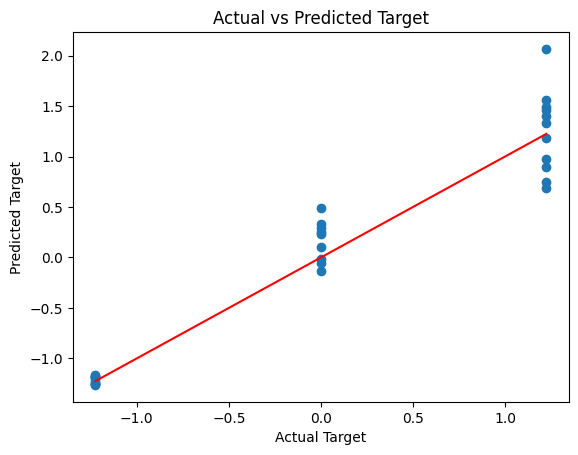

In [8]:
# Split the data
X = poly_df.drop('target', axis=1)
y = poly_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Target")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Add diagonal line
plt.show()

### Scatter Plot Explanation

The scatter plot at the end of the notebook visualizes the relationship between the actual quality ratings of the wine (true values) and the predicted quality ratings (predictions) made by the linear regression model. Here's a detailed explanation of what this scatter plot represents and how to interpret it.

#### Purpose of the Scatter Plot

The scatter plot serves as a visual evaluation tool for the regression model's performance. It helps in understanding how well the model's predictions align with the actual values.

#### Plot Details

- **X-axis**: Represents the actual quality ratings of the wine, which are the true values from the dataset.
- **Y-axis**: Represents the predicted quality ratings of the wine, which are the outputs of the linear regression model.
- **Data Points**: Each point on the scatter plot corresponds to a single wine sample from the test set. The position of the point reflects the actual quality rating (x-coordinate) and the predicted quality rating (y-coordinate).

#### Interpretation

- **Ideal Scenario**: If the model perfectly predicted the wine quality ratings, all the points would lie on a 45-degree diagonal line (y = x). This line indicates that the predicted value equals the actual value.
- **Deviation from Diagonal**: The further a point is from the diagonal line, the greater the error in the prediction. Points above the diagonal indicate overestimation by the model, while points below indicate underestimation.
- **Spread of Points**: The spread of the points around the diagonal line gives an indication of the model's accuracy. A tight cluster around the diagonal line suggests good predictive performance, while a wide spread indicates more s predictions are to the actual values. 

### Key Points

1. **Diagonal Line**: Represents the ideal scenario where predictions perfectly match the actual values.
2. **Data Points**: Each point represents a sample, with its position showing the actual and predicted quality ratings.
3. **Closeness to Line**: Points closer to the diagonal line indicate better predictions. Points further away indicate larger prediction errors.
4. **Distribution**: Analyzing the distribution of points helps assess model performance and identify patterns in prediction errors.

By examining the scatter plot, you can quickly gauge the effectiveness of your regression model and identify areas where it might be underperforming.

Durbin-Watson statistic: 1.6376745685715357


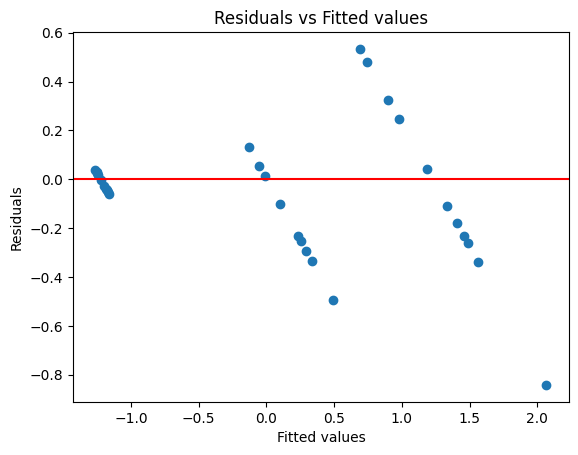

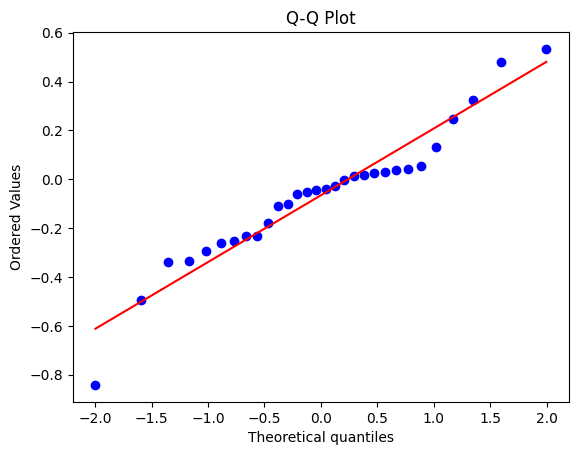

                                feature          VIF
0                     sepal length (cm)     8.323450
1                      sepal width (cm)     2.531959
2                     petal length (cm)    41.198825
3                      petal width (cm)    30.180612
4                   sepal length (cm)^2    70.754670
5    sepal length (cm) sepal width (cm)    22.391490
6   sepal length (cm) petal length (cm)   541.062404
7    sepal length (cm) petal width (cm)   147.656227
8                    sepal width (cm)^2     6.912254
9    sepal width (cm) petal length (cm)   125.962319
10    sepal width (cm) petal width (cm)    45.569898
11                  petal length (cm)^2   656.456096
12   petal length (cm) petal width (cm)  1013.047625
13                   petal width (cm)^2   184.288661


In [9]:
# Check for Independence: Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Check for Homoscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Check for Normality of Residuals: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Check for Multicollinearity: VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

### Explanation

1. **Load the Dataset**: The "Wine Quality" dataset is loaded from a URL and converted into a pandas DataFrame.
2. **Explore the Data**: Summary statistics and a correlation matrix are generated to understand the relationships between features.
3. **Handle Missing Values**: We check for any missing values in the dataset.
4. **Feature Transformation**: The features are standardized using `StandardScaler`.
5. **Feature Creation**: Polynomial features are created using `PolynomialFeatures` to capture non-linear relationships.
6. **Split the Data**: The data is split into training and testing sets.
7. **Train the Model**: A linear regression model is trained using the engineered features.
8. **Evaluate the Model**:  The model is evaluated using mean squared error, and a scatter plot of actual vs. predicted values is generated. A diagonal line is added to the plot for reference.
9. **Independence Check**: The Durbin-Watson statistic is calculated to check for autocorrelation in the residuals.
10. **Homoscedasticity Check**: A residuals vs. fitted values plot is generated to check for constant variance in the residuals.
11. **Normality Check**:  A Q-Q plot is used to assess the normality of the residuals.
12. **Multicollinearity Check**: The Variance Inflation Factor (VIF) is calculated for each feature to check for multicollinearity.
This example demonstrates how feature engineering can be applied to improve the performance of a linear regression model by transforming and creating new features.